In [1]:
import os
from dotenv import load_dotenv
load_dotenv()
os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")



In [2]:
from langchain_groq import ChatGroq

llm = ChatGroq(model="qwen/qwen3-32b")

In [3]:
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END

class State(TypedDict):
    topic:str
    story:str
    improved_story:str
    final_story:str

def generate_story(state:State):
    '''used to generate story'''
    story = llm.invoke(f"Write a one sentence story premise about {state["topic"]}")
    return {'story':story}

def improve_story(state:State):
    '''used to improve the story generated'''
    improved_story = llm.invoke(f"Enhance this story premise with vivid details: {state['story']}")
    return {'improved_story':improved_story}

def final_story(state:State):
    '''used to give final touch to the story improved'''
    final_story = llm.invoke(f"Add a final plot twist which wil be revealed in the next chapter to build curiosity: {state['improved_story']}")
    return {'final_story':final_story}

def conditional_route_cond(state:State):
    if('?' in state['story'] or '!' in state['story']):
        return 'Fail'
    return 'Pass'

In [6]:
graph_builder = StateGraph(State)

graph_builder.add_node("generate_story",generate_story)
graph_builder.add_node("improve_story",improve_story)
graph_builder.add_node("final_story",final_story)


graph_builder.add_edge(START,"generate_story")
graph_builder.add_conditional_edges("generate_story",conditional_route_cond,{"Pass":"improve_story","Fail":"generate_story"})
graph_builder.add_edge("improve_story","final_story")
graph_builder.add_edge("final_story",END)

graph = graph_builder.compile()

In [10]:
from IPython.display import Image ,display

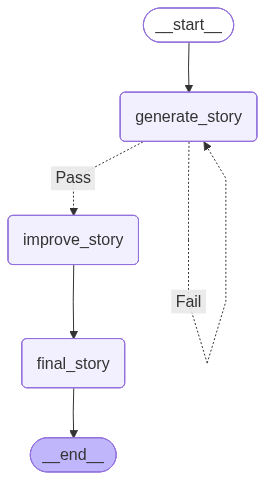

In [11]:
graph_image = graph.get_graph().draw_mermaid_png()
display(Image(graph_image))

In [12]:
state = {"topic": "A love story"}
messages = graph.invoke(state)
messages

{'topic': 'A love story',
 'story': AIMessage(content="<think>\nOkay, the user wants a one-sentence story premise about a love story. Let me start by thinking about the key elements of a love story. There's usually two main characters who come from different backgrounds or have some obstacle between them. Maybe a modern twist? Like different cultures or social classes. Wait, the user might want something unique, not just the typical meet-cute.\n\nHmm, maybe set it in a specific location to add flavor. A small town? Or a big city? A big city could offer more diversity. Let me think about conflicts. Maybe one character is an artist and the other is a scientist, so there's a clash of creativity vs. logic. That could create interesting dynamics. But how to make it a one-sentence premise?\n\nAlso, the user might appreciate some emotional depth. Perhaps the characters have to overcome personal demons or external pressures. Maybe a time constraint? Like a temporary project that forces them to